In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import math
from sklearn.model_selection import train_test_split

%matplotlib inline

Нека си заредим train сета, и директно да разделим колоните на числови и категорийни.

Нека след това запълним празните места по подходящ начин.

In [2]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
numeric_column_names = train.describe().columns.drop(labels=["SalePrice"])
categorical_column_names = train.dtypes[train.dtypes == 'object'].index

train[numeric_column_names] = train[numeric_column_names].fillna(0);
train[categorical_column_names] = train[categorical_column_names].fillna('');

In [3]:
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

Да погледнем числовите колони:

In [4]:
pd.options.display.max_columns = 36
pd.options.display.max_rows = 10
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,58.414873,58.435421,10735.380626,6.073386,5.545988,1971.486301,1984.690802,105.003914,443.613503,45.534247,573.775930,1062.923679,1163.329746,348.274951,5.100783,1516.705479,0.404110,0.055773,1.576321,0.366928,2.853229,1.048924,6.522505,0.607632,1883.831703,1.776908,478.014677,91.718200,48.040117,21.546967,3.934442,14.780822,3.440313,39.080235,6.277886,2007.829746
std,44.416250,35.430350,11344.844137,1.373991,1.096401,30.262989,20.737629,181.735760,464.425961,155.139109,445.058138,447.587824,392.060942,437.429167,44.532534,527.776850,0.516242,0.233822,0.548836,0.494239,0.844400,0.229025,1.646824,0.642641,423.633699,0.733376,212.612947,125.674902,68.896801,58.997097,32.831010,55.423160,45.265717,335.892594,2.731375,1.333798
min,20.000000,0.000000,1300.000000,2.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,41.000000,7564.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,229.250000,796.000000,888.000000,0.000000,0.000000,1125.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,63.000000,9544.500000,6.000000,5.000000,1972.500000,1993.500000,0.000000,380.500000,0.000000,485.000000,995.000000,1080.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,168.000000,719.750000,0.000000,813.500000,1299.750000,1390.500000,729.000000,0.000000,1786.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2153.000000,6110.000000,4692.000000,2065.000000,528.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,318.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


Чакай малко.. тук някои колони изглеждат сякаш не принадлежат особенно към numeric columns..
Нека почетем малко описание на тях.

In [5]:
file = open('data/house-prices/data_description.txt', 'r')
for line in file:
    print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

Аха! Е, значи изглежда, че линейна връзка най-вероятно няма в MSSubClass, OverallQual, OverallCond, YearBuilt, YearRedomAdd,
BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars,
MoSold, YrSold.

Отразяваме това в индексацията.


In [6]:
numeric_onehot_columns = pd.Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'])
numeric_column_names = numeric_column_names.drop(numeric_onehot_columns);


Искаме да one-hot-encode-нем както категорийните колони, така и тези числови колони, в които няма линейна зависимост.

### Да натренираме... регресор само с тези данни

In [7]:
one_hot_columns = categorical_column_names.append(numeric_onehot_columns)

one_hot_encoder = OneHotEncoder().fit(train[one_hot_columns])

one_hot_x_train = one_hot_encoder.transform(x_train[one_hot_columns])

cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(x_test[one_hot_columns])
print(cat_regression.score(one_hot_x_test, y_test))

0.9462210248078654
0.7243900373942552


Екстремно много overfit-ваме ;(
За съжаление това, което на пръв поглед изглежда логично, се оказва неефкитвно, и резултата в kaggle е по-нисък. Може би сме прекалили с one-hot категориите.. 
Нека да се вгледаме в типа зависимости между SalePrice и променливите в които имаме съмнения за линейност.

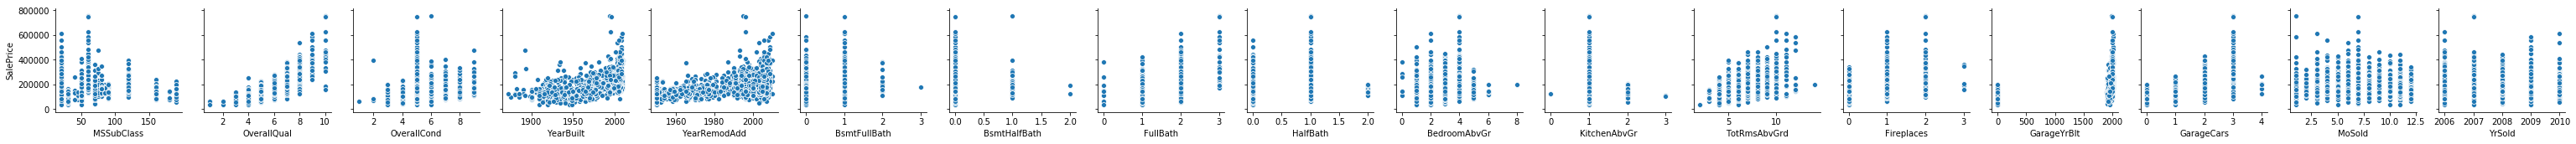

In [8]:
sns.pairplot(data=train,
             x_vars = numeric_onehot_columns,
             y_vars = ["SalePrice"]
            );

Добре, от тези графики можем да изведем, че все пак има някои взаимовръзки, които, ако не линейно, то са достатъчно близо до линейни за да не си струва да си усложняваме модела допълнително като ги one-hot-encode -ваме.
Нека се вгледаме още по отблизо.

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


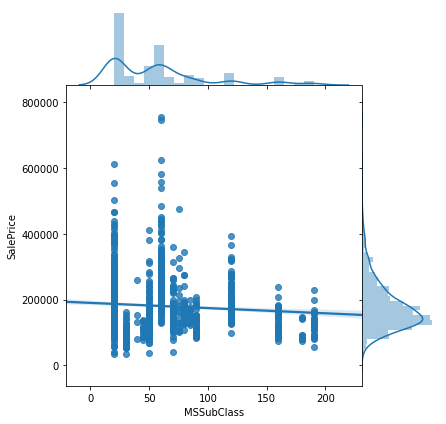

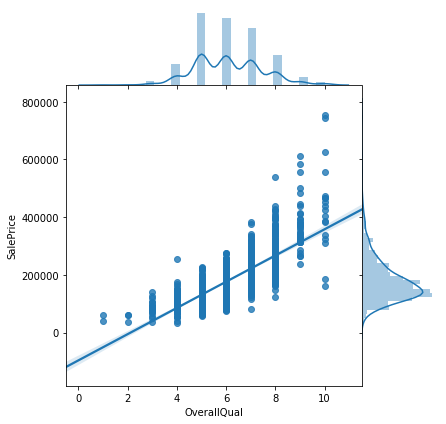

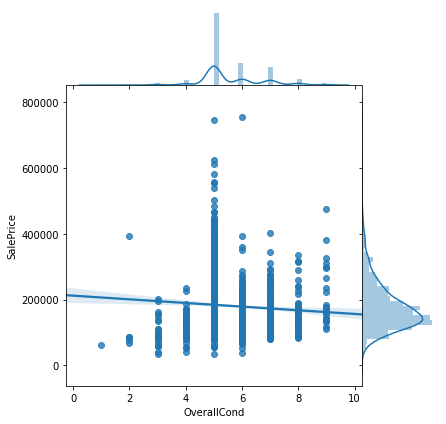

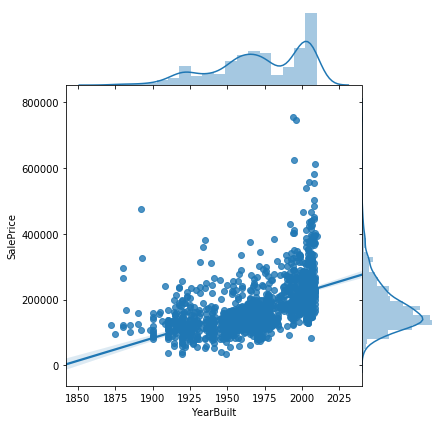

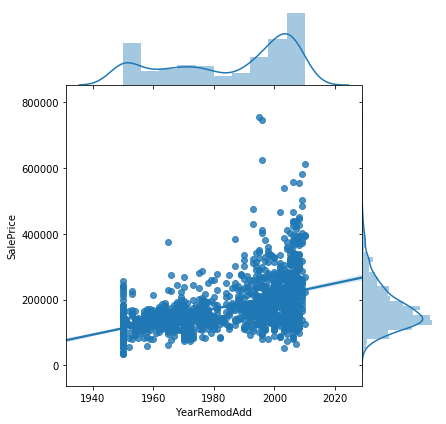

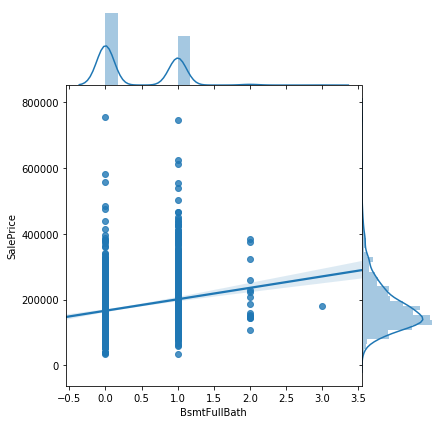

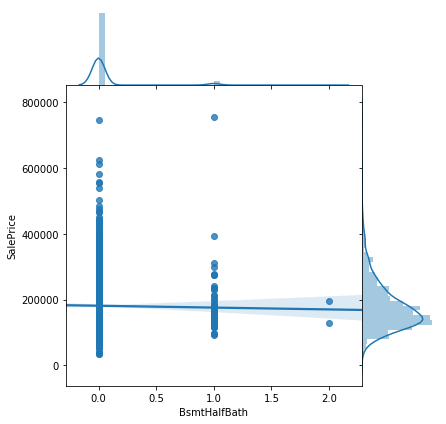

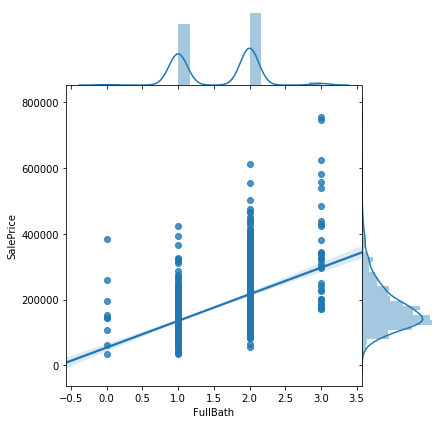

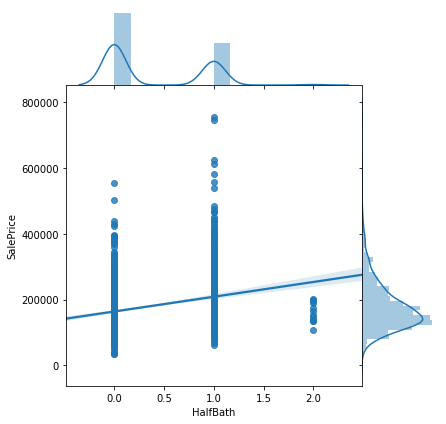

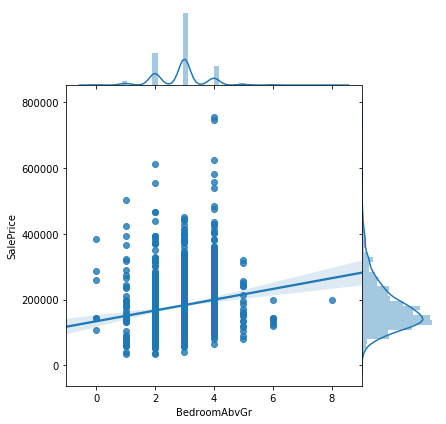

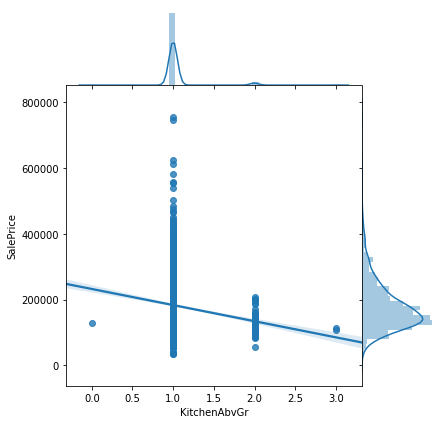

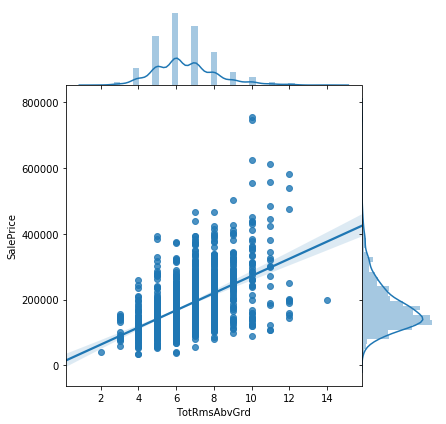

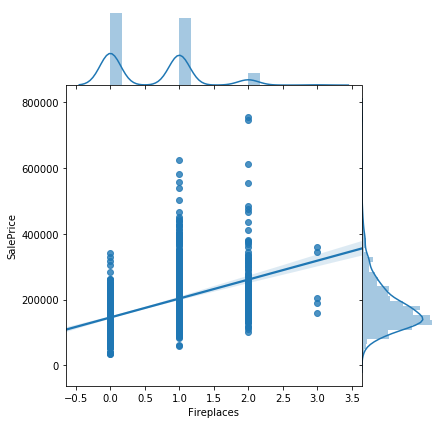

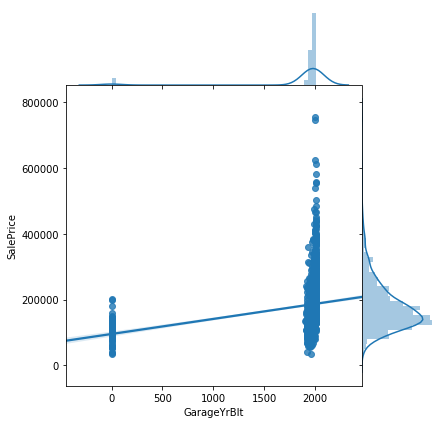

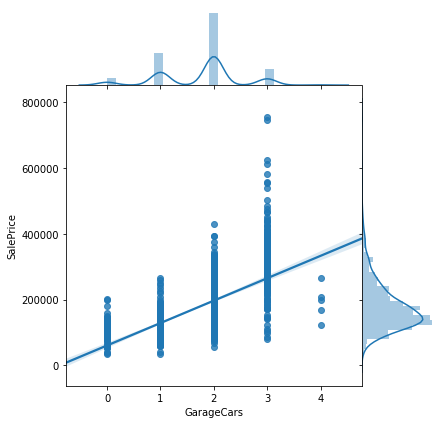

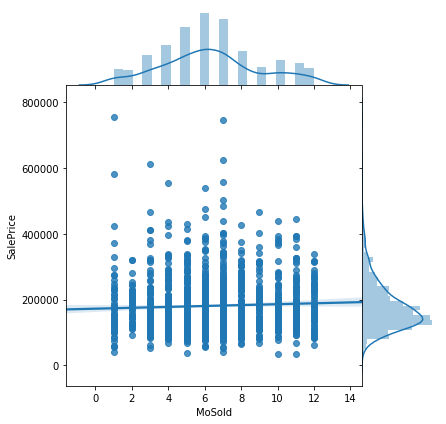

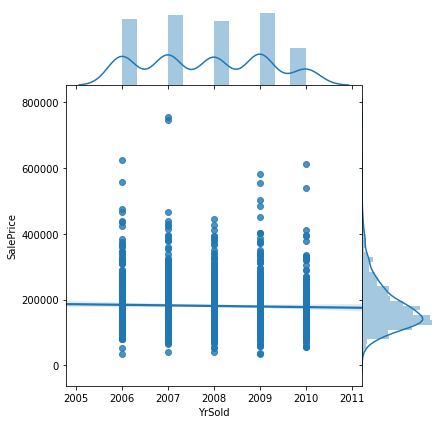

In [9]:
#['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
#           'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']

for index in numeric_onehot_columns:
    sns.jointplot(data=train,
                   x=index, 
                   y='SalePrice', 
                   kind='reg', 
                   space=0, height=6, ratio=4);
    
    
numeric_after_all = pd.Index(['MSSubClass', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd',
                              'BsmtFullBath', 'FullBath',
                              'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars'])



След известно мислене, и рънване на опити, стигаме до следните заключения:

1) Огромната част от тези колони са окей да бъдат моделирани линейно. Категорийните ни колони са си вече overfit-ващи.

2) Има някои колони, които или имат много голям шум в тях, или не допринасят с почти нищо за модела. Ще премахнем тези колони.

In [10]:
numeric_onehot_columns = numeric_onehot_columns.drop(numeric_after_all);

numeric_columns_to_drop = pd.Index(['BsmtHalfBath','BedroomAbvGr', 'MoSold','YrSold' ])
numeric_onehot_columns = numeric_onehot_columns.drop(numeric_columns_to_drop)

numeric_column_names = numeric_column_names.append(numeric_after_all)

Нека да видим как сега изглеждат нещата за нас

In [11]:
one_hot_columns = categorical_column_names.append(numeric_onehot_columns)

one_hot_encoder = OneHotEncoder().fit(train[one_hot_columns])

one_hot_x_train = one_hot_encoder.transform(x_train[one_hot_columns])

cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(x_test[one_hot_columns])
print(cat_regression.score(one_hot_x_test, y_test))


0.8791821838208631
0.7507015483475308


Overfit-a все още е солиден, но все пак има известно подобрение. Решаваме, че щом сме тръгнали да преглеждаме зависимост,
ще минем и през останалите числови колони.

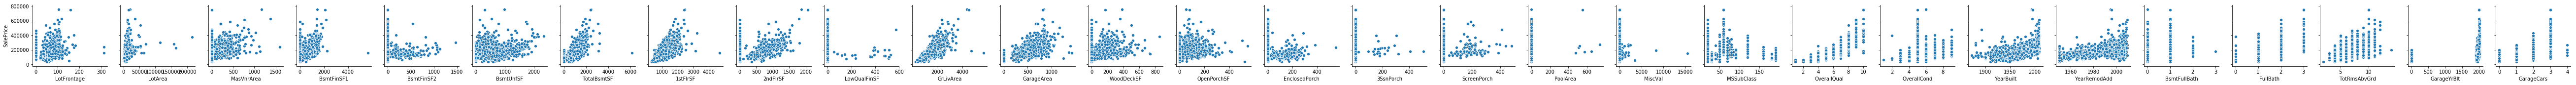

In [12]:
sns.pairplot(data=train,
             x_vars = numeric_column_names,
             y_vars = ["SalePrice"]
            );

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\python37\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


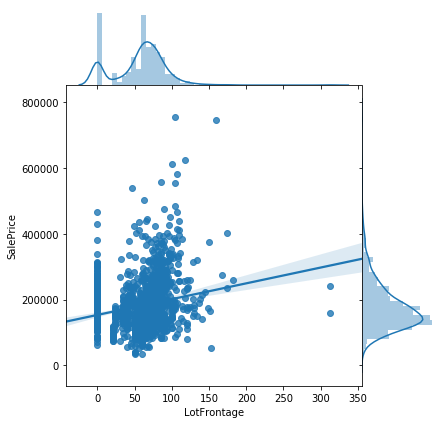

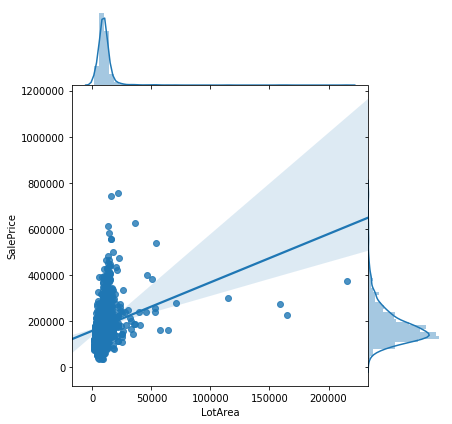

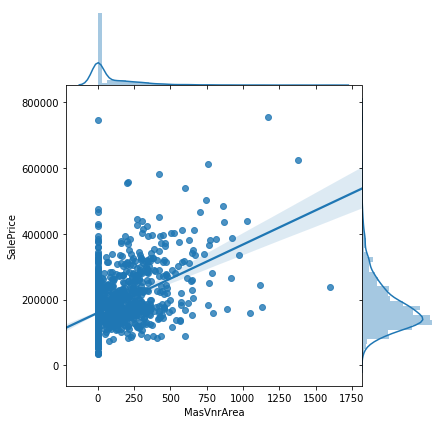

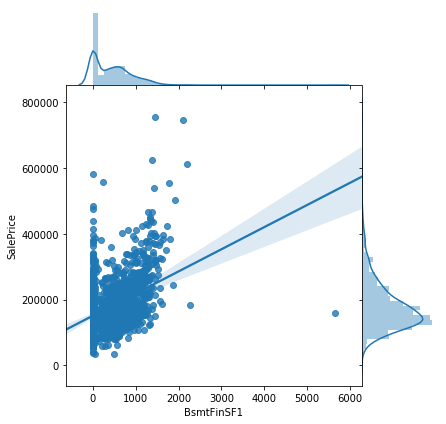

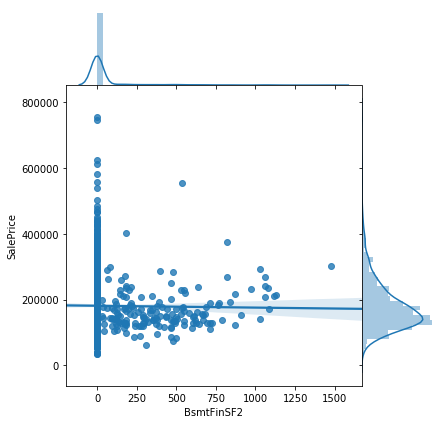

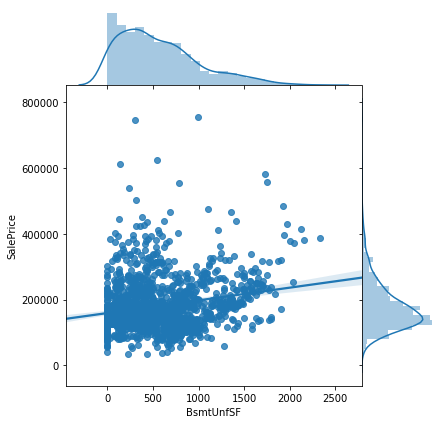

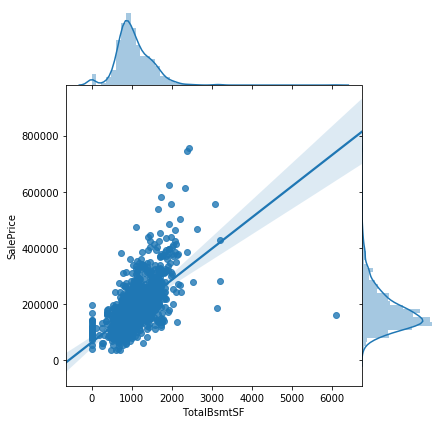

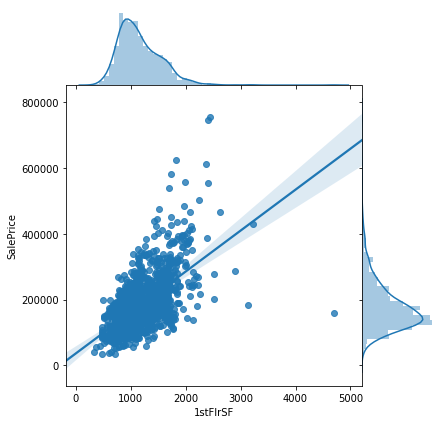

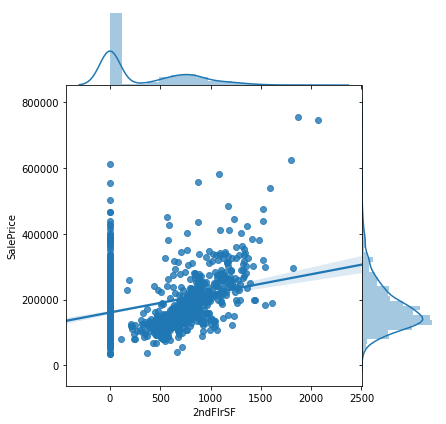

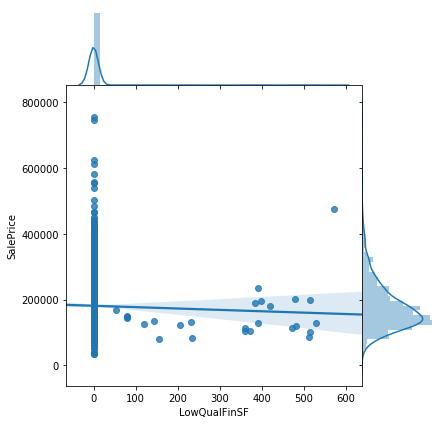

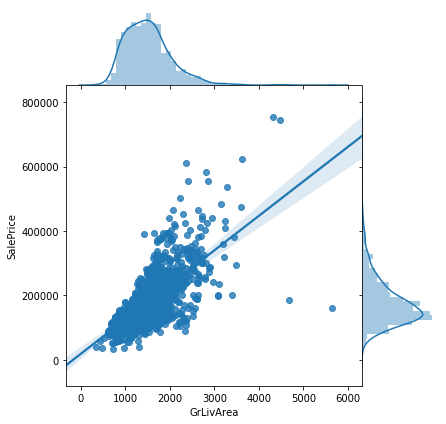

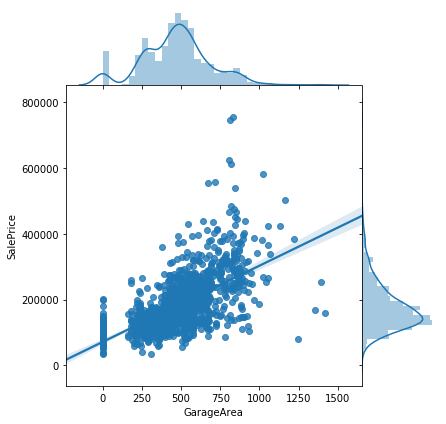

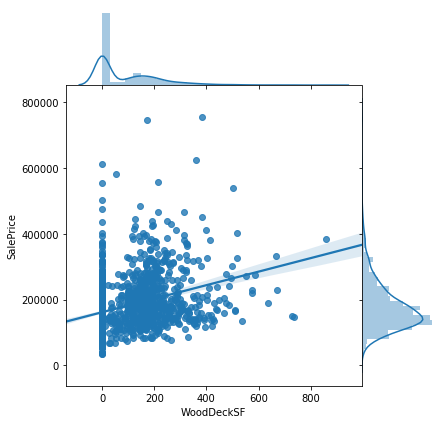

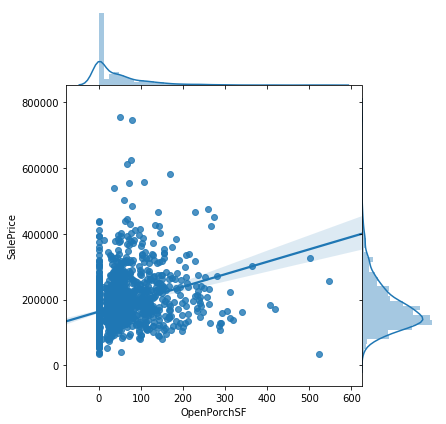

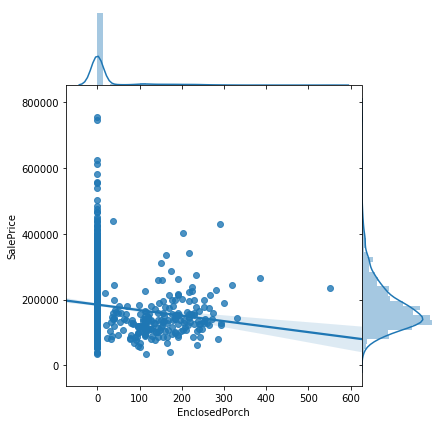

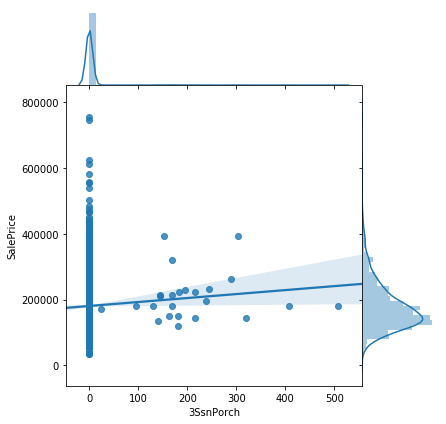

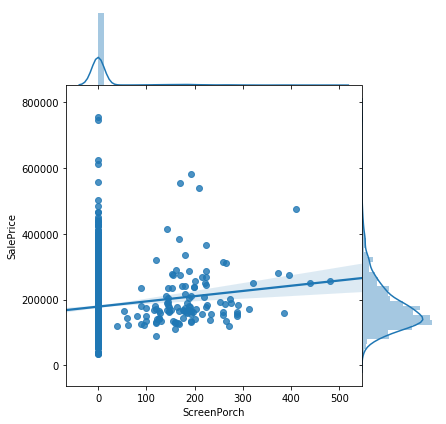

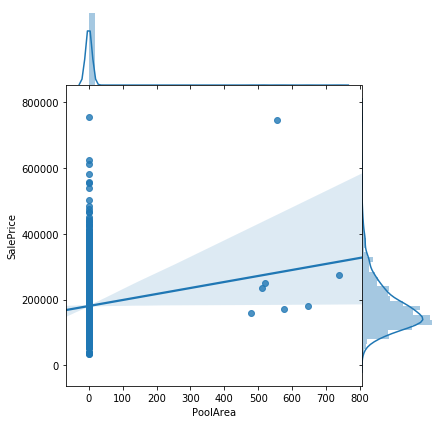

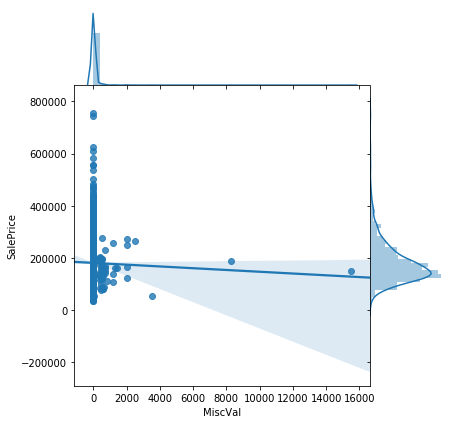

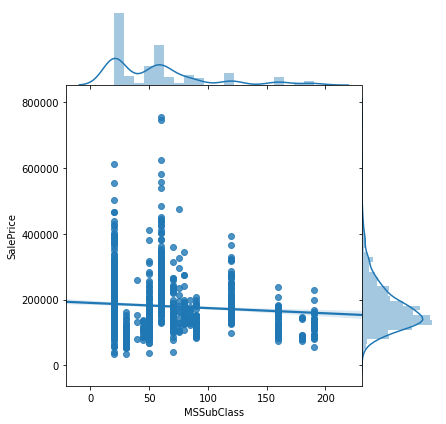

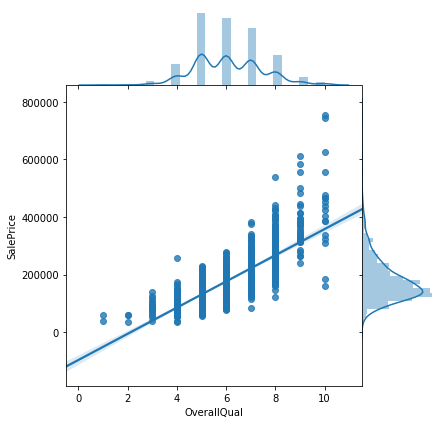

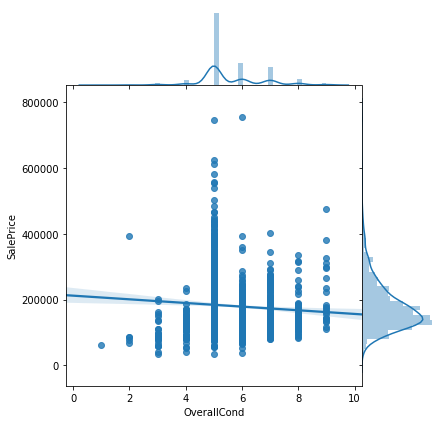

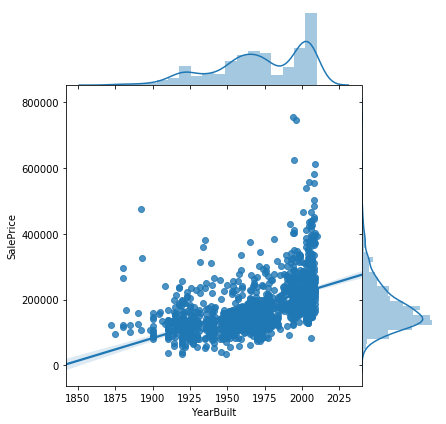

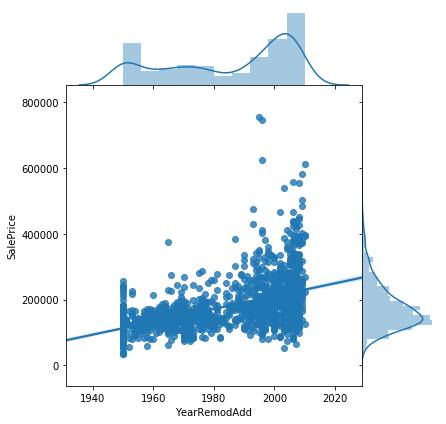

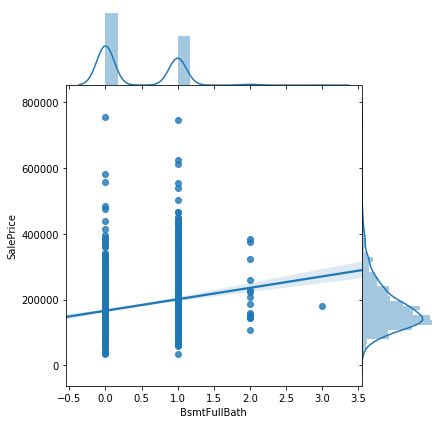

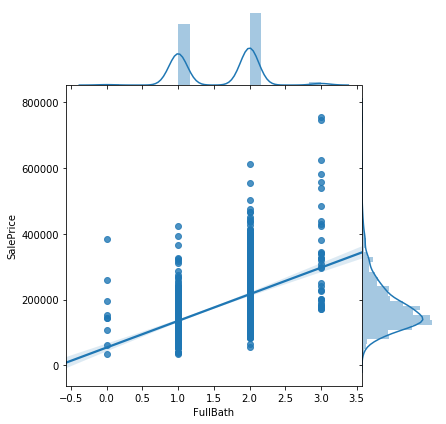

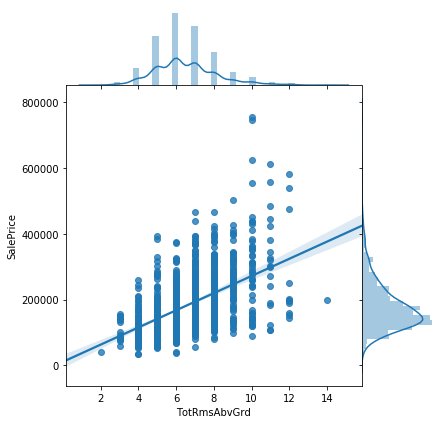

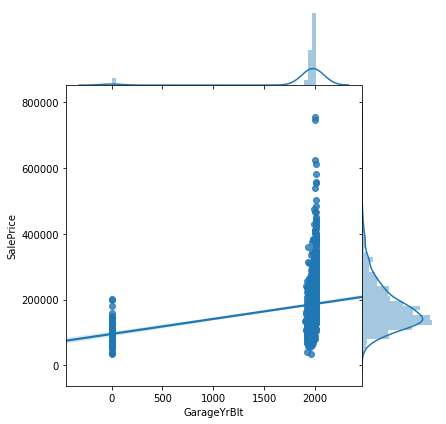

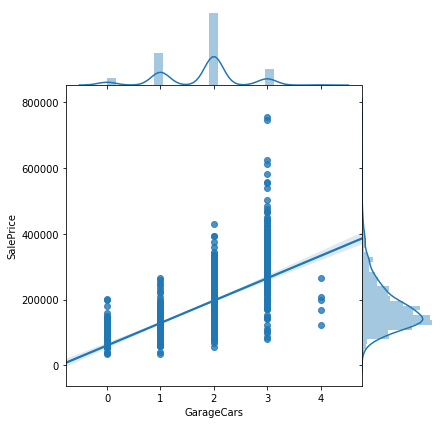

In [13]:
for index in numeric_column_names:
    sns.jointplot(data=train,
                   x=index, 
                   y='SalePrice', 
                   kind='reg', 
                   space=0, height=6, ratio=4);

Гледаме зависимостите, и drop-ваме колоните, където нещата изглеждат if-y.
(преди това сме си поиграли да изтестваме как drop-ването на по-голямата част от тези променливи би афектирало score-a).

In [14]:
#'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','

numeric_columns_to_drop = pd.Index(['LotFrontage', 'OpenPorchSF', '3SsnPorch', 'PoolArea',
                                    'LowQualFinSF', 'BsmtUnfSF'])
numeric_column_names = numeric_column_names.drop(numeric_columns_to_drop)

In [15]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
print(new_x_train.shape, new_x_test.shape)

(1022, 302) (438, 302)


In [16]:
maxTest = [0,0,0]
curTest = [0,0,0]
bestSolver = ""

for solverName in ['auto','svd']:
    for i in range (1, 50):
        all_data_lr = Ridge(alpha = i, solver=solverName).fit(new_x_train, pd.np.log10(y_train))
        curTest[0] = all_data_lr.score(new_x_train, pd.np.log10(y_train))
        curTest[1] = all_data_lr.score(new_x_test, pd.np.log10(y_test))
        curTest[2] = i
        if(maxTest[1] < curTest[1]):
            maxTest = curTest[:]
            bestSolver = solverName
        
bestAlpha = maxTest[2]
        
print ("train score: ", maxTest[0])
print ("test score: ", maxTest[1])
print ("alpha: ", bestAlpha)
print ("bestSolver", bestSolver)

train score:  0.9082380333620261
test score:  0.9290735070971873
alpha:  18
bestSolver auto


In [17]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])

onehot_def_data = train.append(test, sort=False)
onehot_def_data.shape

onehot_def_data[categorical_column_names] = onehot_def_data[categorical_column_names].fillna("")
onehot_def_data[numeric_onehot_columns] = onehot_def_data[numeric_onehot_columns].fillna(0)

one_hot_encoder = OneHotEncoder().fit(onehot_def_data[categorical_column_names.append(numeric_onehot_columns)])


In [18]:
def pipeline_data(data):
    data[numeric_column_names.append(numeric_onehot_columns)] = data[numeric_column_names.append(numeric_onehot_columns)].fillna(0)
    data[categorical_column_names] = data[categorical_column_names].fillna("")
    _numeric = data[numeric_column_names]
    _one_hot = data[categorical_column_names.append(numeric_onehot_columns)]
    _one_hot_encoded = one_hot_encoder.transform(_one_hot)
    _merged = pd.np.concatenate([_one_hot_encoded.todense(), _numeric], axis=1)
    return _merged

In [19]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,...,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,...,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,...,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,...,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,...,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,...,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,...,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,...,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [20]:
full_x = pipeline_data(train)
full_y = train['SalePrice']

# Fix test set missing data problems
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)

test_set = pipeline_data(test)

По-нагоре експериментално намерихме, alpha-та и solver-a за които ridge работи най-добре с логаритмуваните данни.
Забележка: След някакво количество експериментиране с lasso, решаваме че ridge е по-добра идея за тези данни.

In [21]:
ridge = Ridge(alpha=bestAlpha, solver=bestSolver).fit(full_x, pd.np.log10(full_y))

In [22]:
predictions = 10**ridge.predict(test_set)
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})

Нека проверим дали ще си струва да закръгляме, и докъде:

In [23]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
print(len(train[train['SalePrice']%100 == 0]))
print(len(train[train['SalePrice']%500 == 0]))
print(len(train[train['SalePrice']%1000 == 0]))

1325
1163
891


Решаваме, че най-добра идея ще бъде да закръглим до първите 3 знака.
Unfortunately, kaggle не е съгласен с нашият ред на мисли, и не успяваме да си подобрим резултата ;(
След като не успяваме и със закръгляне до първите 2 знака, решаваме да спрем да си гърмим daily опитите за глупости.

In [24]:
predictions_backup = predictions_df.copy()

for i in range(0, len(predictions_df)):
    pred = predictions_df['SalePrice'][i]
    if(abs(pred/1000 - math.ceil(pred/1000)) < abs(pred/1000 - math.floor(pred/1000))):
        predictions_df.loc[i, 'SalePrice'] = math.ceil(pred/1000) * 1000
    else:
        predictions_df.loc[i, 'SalePrice']  = math.floor(pred/1000) * 1000

print(predictions_df.head())

predictions_df = predictions_backup

     Id  SalePrice
0  1461   115000.0
1  1462   151000.0
2  1463   173000.0
3  1464   199000.0
4  1465   196000.0


In [25]:
predictions_df.to_csv("/Users/Kaloyan/Documents/JupyterNotebooks/submit_me.csv", index=False)
predictions_df.head()

,Id,SalePrice
0,1461,115088.106936
1,1462,151309.250206
2,1463,172897.256057
3,1464,198837.594499
4,1465,195814.555084


Overall, позиция 1373 в Kaggle. Какво друго да пробваме? Ако имах повече време, щях да изпробвам вземане на медиана за попълване на празните стойности в числовите данни, и на мода за попълване на празните стойности в категорийните. Един левел по-нагоре е да намираме празните стойности чрез линейна регресия спрямо тази колона.

В малкото време, което отделих за да експериментирам с полиноми, намерих че не работят особено добре в случая, особено при положение, че се борим с overfitting. 